<a href="https://colab.research.google.com/github/Aleksandrovna15/DAT-301/blob/main/Paper_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAT 301 Project 2 - Linear Regression

## Introduction
### Project Statement
The goal of this project is to create a basic linear regression model based on a single important parameter, such as hours studied, to predict the students success. The dataset used for this project is sourced from Kaggle: Student Performance (Multiple Linear Regression). This study is relevant since it offers a straightforward but efficient instrument for academic performance prediction that can be readily understood and used. Machine learning models allow one to automate this procedure, hence improving efficiency, lowering bias, and increasing decision accuracy.

Many factors can play in a student's academic success and isolating the hours studied can not give the most accurate predictions. However, studying is stereotypically more correlated to better results.

### Linear Regression
A statistical method for determining the linear relationship between a dependent variable and one or more independent variables is called linear regression. This method can be used to predict a continuous variable in supervised learning regression situations. Simple and multiple linear regression are the two subtypes of linear regression.

**Simple linear regression** is a foundational statistical technique used to model the relationship between a dependent variable and a single independent variable. It is widely applied across various domains, including finance, economics, and social sciences, due to its simplicity and interpretability. According to the National Centre for Learning (NCL), simple linear regression aims to fit a straight line to the data, represented by the equation  

$y=β0+β1x$  

where  $y$  is the dependent variable,  $x$  is the independent variable,  $β0$  is the intercept, and  $β1$  is the slope of the line.

This method is particularly useful for understanding and quantifying the linear relationship between two variables, making it a popular choice for predictive modeling tasks. This project will only have one independent variable and one dependent variable. Fitting a straight line to the data is the most basic type of linear regression.

To simplify this concept even further, the relationship can be described by a line:

$y = ax + b$

where $a$ is $β1$ and $b$ is $β0$.

Multiple linear regressions follow a similar methodology, but they include more than one coefficient. The model will still follow a linear pattern, but it will count multiple factors (independent variables) to calculate the result (dependent variable). The equation for a multiple linear regression model will be in the form $y=β0+β1x+β2x+β3x...$ where $y$ is the dependent variable and $x$ is the independent variable, $β0$ is the intercept, and $β1,β2,β3...$ are responsible for the slope of the line.

### Linear Regression Assumptions

While constructing a linear regression model, we need to keep in mind some assumptions that have to be taken into account.
1. Linearity
   *   The relationship between the independent and dependent variables is linear.
   *   This simply means that any changes made to the independent variable is proportional to the dependent variable and vice versa.
2. Homoscedasticity of Residuals
   * Homoscedasticity is an assumption that states that the residuals, which are the differences between actual and estimated values, should have a constant variance overall. The spread of errors should be relatively uniform.
3. Multivariate Normality
   *   The residuals should be normally distributed when considering multiple predictors. This plays a crucial role when analyzing data statistics and shows the validity of the tests performed.
4. Independence of Errors
   *   It ensures that the residuals are not correlated with each other or in other words, the error of one observation does not influence the error of another observation.
5. Lack of Multicollinearity
   *   Multicollinearity is when two or more independent variables in the model are way too correlated, leading to possible replication of data. It can affect other statistics, making it harder to figure out the relationship between the independent and dependent variables.
6. Absence of Endogeneity
   *   Mainly applies to the multiple regression models. No endogeneity means that the independent variables in the regression model should not be correlated with the error term. Violating this assumption can cause bias in the coefficient estimates.

## Math Method
### Least Squares Method

As we plot the data points on a plane, we need to figure out how we can find the **regression line** that represents our model. The goal is to get the line as close to the points as possible and divide the scatter plot in half, half of the data points on one side of the line and half on the other. This line will represent the relationship between the independent and the dependent variables.

The least squares method helps us find the parameters of the regression line by calculating the error, the difference between the actual data point ($y_x$) and the point estimated by the regression line ($ŷ_x$), and thus, helping us find the line with the least amount of error. The amount of error in a line can be described by a function that we call the **Cost Function**.

Since we are looking for a line that is relatively closest to all points, we need to look for a line with the least amount of error. We can minimize the error by calculating the residual, the distance between the actual $y$ value and the estimated $y$ value, using the formula denoted by $d_x$:

$d_x = y_x - ŷ_x$

where x is our independent variable.

The Cost Function is the sum of all the residuals squared, hence, it describes the Least Squares Method. The reason why it is square is that the residuals can be negative, which would cancel out the positive residuals. If we consider this issue realistically, we simply can not have a negative distance. Thus, we square the residuals to cancel out the negatives. The function is described by the formula:

$D = Ʃ(d_x)^2$

Going back to our objective, using this formula, we can calculate the error of the line using all residuals and find the line of best fit, the regression line, so that the error is as small as possible.

By minimizing the error, $D$, we can estimate the coefficients $β0$ and $β1$ of the regression line described by the equation:

$y=β0+β1x$

For this project, we will be calculating metrics such as R-squared and Root Mean Squared Error (RMSE) to evaluate the created model's performance.

## Data



### Importing the dataset
The data for this project was taken from kaggle.com, which provides numerous public datasets. The chosen dataset for this specific project is the Student Performance (Multiple Linear Regression) dataset by Nikhil Narayan. This dataset has around 10,000 data points and contains many columns, factors, including hours studied, previous scores, extracurricular activities, sleep hours, sample question papers practiced, and performance index. In this case, the performance index is measured between 10 and 100 and can be closely described as test scores. For simplicity, we will be analyzing the correlation between the performance index (dependent variable) and hours studied (independent variable).

**Kaggle link to the dataset:** https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

Below, we are importing the dataset into the variable df, which we will also be analyzing further.

In [ ]:
import pandas as pd
# Importing the dataset
file_path = 'Student_Performance.csv'
df = pd.read_csv(file_path, usecols=['Hours Studied', 'Performance Index'])

After we read the file, we store it as a file object using a pandas library function read_csv(). However, this function is not the only one in the pandas library. We can explore more attributes of a file object using other functions.

### pandas info()
To start off, the info() function can display the basic description of our dataset.

In [ ]:
# display the characteristics of df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hours Studied      10000 non-null  int64  
 1   Performance Index  10000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 156.4 KB
None


### pandas head()
The head function simply accesses the file object and returns the first 5 rows of it. We can use print() to display it.

In [ ]:
# displaying first 5 rows of the file object
print(df.head())

   Hours Studied  Performance Index
0              7               91.0
1              4               65.0
2              8               45.0
3              5               36.0
4              7               66.0


### pandas shape()
This one displays the dimensions of the uploaded dataset.

In [ ]:
# display the dimention of df
print(df.shape)

(10000, 2)


### Adding columns
Using the attribute columns, we can better organize the dataset and add column names.

In [ ]:
# adding columns
df.columns = ['Hours Studied', 'Performance Index']

Now we can display and see the updated table.

In [ ]:
# print the first 5 rows of the updated table
print(df.head())

   Hours Studied  Performance Index
0              7               91.0
1              4               65.0
2              8               45.0
3              5               36.0
4              7               66.0


### pandas describe()
Describe is similar to info except that it actually calculates some basic statistics of the data, like min, max, the mean, etc.

In [ ]:
# display the description of df and basic statistics
print(df.describe())

       Hours Studied  Performance Index
count   10000.000000       10000.000000
mean        4.992900          55.224800
std         2.589309          19.212558
min         1.000000          10.000000
25%         3.000000          40.000000
50%         5.000000          55.000000
75%         7.000000          71.000000
max         9.000000         100.000000


## Implementation

We will be implementing the methodology using some built-in Python Libraries
*   Numpy: Which provides methods for fast calculations and needed data structures.
*   pandas: Which helps with storage and data manipulation/ analysis.
*   Matplotlib: Helps with basic plots and data formatting.
*   Scikit - Learn: A machine learning library that helps us with regression models.

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('inline')                    #needed for future formatting

## Variables
As mentioned before, to create a proper correlation, the independent variable $x$ will be the hours studied, and the dependent variable $y$ will be the performance index.

The reason is for better graph dimensions and to show that the students study, the higher their scores will be.

The values attribute, using pandas, allows us to take the numerical values from the column and put them into a list.

In [ ]:
# declare the variables and assign proper columns to them
x = df['Hours Studied'].values
y = df['Performance Index'].values

print("Hours Studied: ", x)
print("Performance Index: ", y)

Hours Studied:  [7 4 8 ... 6 9 7]
Performance Index:  [91. 65. 45. ... 74. 95. 64.]


## Visualizing the data
Using pandas and matplot functions, we can make a scatter plot of the dataset. We will be using the input variable/the independent variable in $x$ and the output variable/dependent variable in $y$ for our x and y axes, respectively.

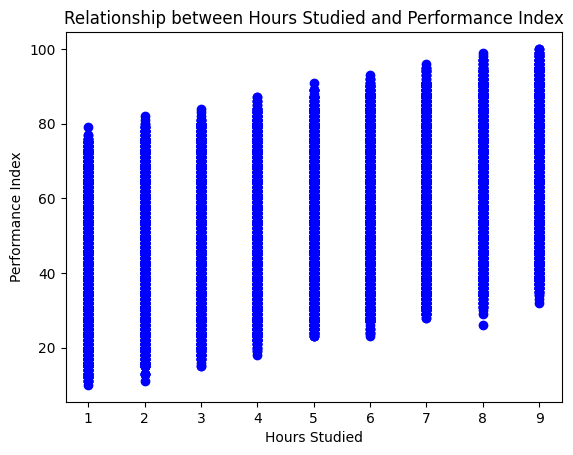

In [ ]:
# plot the scatter plot
plt.scatter(x, y, color = 'blue')
plt.title('Relationship between Hours Studied and Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

### Dimentions of x and y
Due to the fact that we are working with Scikit-Learn, we must check for dimensions of the lists x and y and edit them if needed.

In [ ]:
print(x.shape)
print(y.shape)

(10000,)
(10000,)


From the check, we can see that each array is 10,000 items long. However, we will be working with matrices which means that we must have a height of 1 for the arrays for our math to work.

To do that, we will be using reshape() function from Numpy to specify the dimensions of each array. Since -1 is considered "unspecified", the real dimensions will be recalculated accordingly.

In [ ]:
# reshape the arrays
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [ ]:
# print the newly edited dimensions
print(x.shape)
print(y.shape)

(10000, 1)
(10000, 1)


## Determining the testing sets
We will be splitting the x and y sets into training and testing sets. The model will learn from one and test its knowledge using the other.

In [ ]:
# splitting the two sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
# printing the dimensions of the sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6700, 1)
(3300, 1)
(6700, 1)
(3300, 1)


## Training the model
Now that we have gotten our training and testing sets, we can start training the model.
To do that, we will be using the sklearn library and specifically importing the Linear Regression model. We will train it using the fit() function and then use predict() to test it.

In [ ]:
# import the Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

# predict the output using the model
y_predict = model.predict(x_test)

## Finding the regression line
After training the model, we can find a and b of the regression line equation:

$y = ax + b$ or $y=β0+β1x$  

By accessing the attributes of the model, like coef_ and intercept_, we can now assemble the equation of the line. The coef_ will be our $β1$ and the intercept_ is $β0$.

In [ ]:
b_0 = model.intercept_
b_1 = model.coef_

print("The intercept is: ", b_0)
print("The coefficient is: ", b_1)

The intercept is:  [41.44177]
The coefficient is:  [[2.79845429]]


Thus, the equation of the scatter plot is:

$y = 41.44177 + 2.79845429x$

The line equation provides an estimate of the relationship between the two variables. Thus, predictions can now be made.

## Predicting the output
To predict the points on the line, we can use predict(x) [start:end] where start and end signifies the range of points to predict.

In [ ]:
# predicting the first 10 points
model.predict(x)[0:10]

array([[61.03095006],
       [52.63558718],
       [63.82940436],
       [55.43404148],
       [61.03095006],
       [49.83713289],
       [61.03095006],
       [63.82940436],
       [55.43404148],
       [52.63558718]])

Individual predictions are also possible by substituting a value into x.

## Evaluating the model
As mentioned before, to evaluate the performance of the model, we will be using the R2 score and RMSE.

### R-Squared
R-Squared, or R2, measures the proportion of variance in the dependent variable that can be explained by the independent variable. It also means that R2 measures how well the regression line fits the scatterplot. R2 is measured between 0 and 1.

In [ ]:
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_predict)))

R2 Score value: 0.1311


Since we can see that the correlation is rather small, that means that there is a correlation between teh two variables but its not very strong. However, we can be sure of that only by analyzing the regression line on the graph and other scores.

We also must keep in mind that the data is ditributed in a form of bars made up of many data points. The bars range but the overall trend is positive meaning that there is definetly a correlation present.

### RMSE
The RMSE (root mean square error) measures the average difference between a statistical model's predicted values and the actual data values. It is the standard deviation of the residuals.

In [ ]:
# calculating the rmse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 17.9455


In theory, the lower the RMSE, the lower the differences between the predicted values and the actual values, the better the fit of the line. As we can see, the RMSE of this model is a moderate number compared to our dependent variable range which signifies that the model might not be a good fit.

## Plotting the regression line

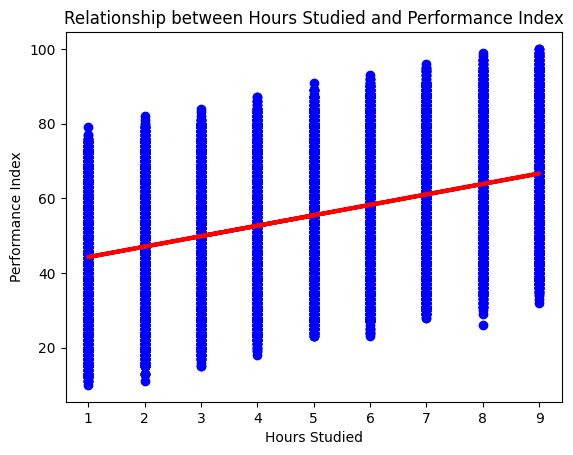

In [ ]:
# Plotting the regression line

plt.scatter(x, y, color = 'blue')
plt.plot(x_test, y_predict, color = 'red', linewidth=3)
plt.title('Relationship between Hours Studied and Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

## Conclusion
As we can see from the plotted graph, there is very minimal correlation between the independent and the dependent variables. The line does show a positive correlation, but since the slope is very small, it doesn't necessarily show a strong correlation.

### Interpreting R-Squared
When R2 is negative, it shows that even when we used the correct data to train the model, it is inapplicable and should not be used. By increasing the size, we can train the model to be more accurate, which actually allows us to increase the values of R2.

The reason why we build regression models is to test the correlation between the input and the output variables. Thus, we have a 50/50 chance that the variables will either be correlated or not. Ideally, a good model should have an R2 value of at least 0.7 however, there are exceptions to this rule. A good model can also have a very low R2 value, and a bad model can have a very high value. Thus, it is not the only indicator of success.

Since R2 is 0.1311, it means the model is applicable, but the data is too distributed to have a strong relationship. It is generally a positive correlation, but we can definitely increase the number of data points to see if the R2 value increases, thus increasing the accuracy of the model.

Due to the scatter plot distribution, it is also hard to say that it is a bad model since the data is too distributed. This signifies that the reason for such bad numbers might not be the model itself, but the lack of correlation between the two parameters.

### Interpreting RMSE
The value of RMSE that we found is 17.9455, which is a relatively high score. Due to the fact that the lower this value is, the less variance there is in the residuals, mathematically we can conclude that this regression model is, again, not very accurate.

However, by looking at the distribution, we go back to the fact that is dataset is very distributed and doesn't seem to show a big correlation between the hours studied and the preformance index. Thus, there is bound to be a lot of variance between the residuals, the difference between the actual and the predicted points.

We must also keep in mind the range of values we have. While the hours are rounded to the nearest integer, the performance index is still from 10 to 100. So, we can always say that although there is a correlation, hours studied is not the only indication of a student's success.

## References

   i. https://www.geeksforgeeks.org/linear-regression-python-implementation/

   ii. https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/simple-linear-regression.html

   iii. https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial

   iv. https://medium.com/@shuv.sdr/simple-linear-regression-in-python-a0069b325bf8

   v. https://www.geeksforgeeks.org/assumptions-of-linear-regression/

   vi. https://corporatefinanceinstitute.com/resources/data-science/r-squared/#:~:text=R%2DSquared%20(R%C2%B2%20or%20the,(the%20goodness%20of%20fit).

   vii. https://statisticsbyjim.com/regression/root-mean-square-error-rmse/

   viii. https://github.com/pb111/Simple-Linear-Regression-Project/blob/master/SLRProject.ipynb

   